

# Project: Investigate a Dataset - TMDb_Movie_data
## By Rofhiwa Kgomo

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset contains of information about 10,000 movies collected from The_Movie_Database from Kaggle. There's enough information which details the best movie directors, well known and decorated actors of all times. The Movie Database includes user ratings and revenues.

### Question(s) for Analysis
> 1. Which year has the highest release of movies?
> 2. Which Month Released Highest Number Of Movies In All Of The Years?
> 3. The length in movies that is Loved by the audience?



In [1]:
# loading necessary libraries
# from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In [2]:
# loading data

mvs_df = pd.read_csv('tmdb-movies.csv')
mvs_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# data information
# data types and missing values

mvs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
mvs_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
mvs_df.duplicated().sum()

1

In [6]:
# counting rows and columns with null values

mvs_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#filling the null values with zero using 'fillna' function
mvs_df = mvs_df.fillna(0)

### Observations from the data wrangling results

> 1. There are 21 columns
> 2. And 10866 rows found
> 3. There is 1 duplicated rows


### Data Cleaning

 

### * Removing duplicated rows from the dataset

In [8]:
# Calculating duplicated rows

sum(mvs_df.duplicated())

1

In [9]:
# drop the duplicated rows

mvs_df.drop_duplicates(inplace=True)
mvs_df.shape

(10865, 21)

In [10]:
# Confirming drop duplicated rows

mvs_df.duplicated().sum()

0

### * I will be removing columns which will not be used in my analysis process

In [11]:
# I will drop the following columns(imdb_id, homepage,tagline, overview, budget_adj and revenue_adj)
# They are not really important for my analysis

mvs_df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'],axis =1,inplace = True)

In [12]:
# I will check how many columns I'm left with after
# removing unwanted columns

mvs_df.shape

(10865, 15)

### * Here I will be changing the date format

In [13]:
# dtype of release date

type(mvs_df.release_date[0])

str

In [14]:
# Inaccurate date format
# We change the date-time format

mvs_df['release_date']=pd.to_datetime(mvs_df['release_date'])
mvs_df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

### Results found after Data cleaning

> 1. There is only 1 duplicated rows, which I dropped to be left with no further duplicates amounting to 0
> 2. Initially there are 10865 rows and 21 columns
> 3. After  removing unused columns, my data is left with only 15 columns
> 4. I also changed the date format data type from string to date-time format

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 Which year has the highest release of movies?

In [15]:
# I'm counting the number of movies in each year 

data = mvs_df.groupby('release_year').count()['id']

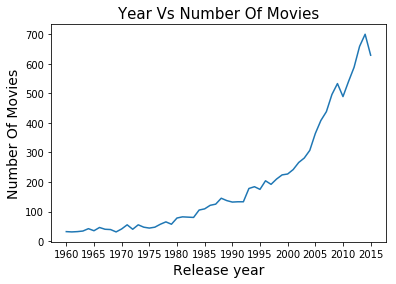

In [16]:
# Here I plot the graph to display the year with most movies released

data.plot(xticks = np.arange(1960,2016,5))
sns.set(rc={'figure.figsize':(15,6)})
plt.title("Year Vs Number Of Movies",fontsize = 15)
plt.xlabel('Release year',fontsize = 14)
plt.ylabel('Number Of Movies',fontsize = 14)

#set the style sheet
sns.set_style("whitegrid")

#### From the above plot and seeing the output, we can conclude that from the early years of 1960 to the late years of the 1990's the number of movies released were lower that 200 each year. In the early 2000's the releasing of movies started escalating with more than 300 realeased per each year. To answer our question at hand, 2014 has the highest number of movies released standing at 700.

### Research Question 2  Which Month Released Highest Number Of Movies In All Of The Years?

In [17]:
# Here I will be showing how many movies are released per month

number_of_release = mvs_df['release_date'].dt.month.value_counts().sort_index()
number_of_release

1      919
2      691
3      822
4      797
5      809
6      827
7      799
8      918
9     1331
10    1153
11     814
12     985
Name: release_date, dtype: int64

Text(0,0.5,'Number of movie releases')

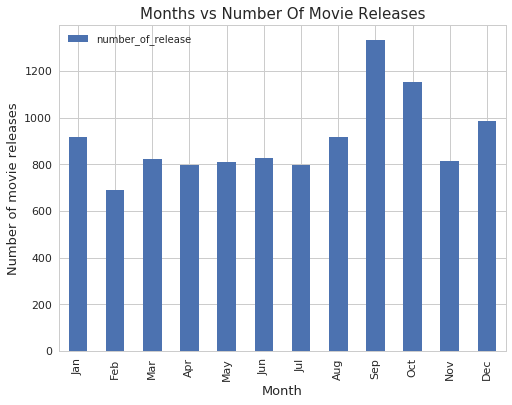

In [18]:
# Plotting the bar graph to show how many movies are released per mont

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)


#### From the plot, February has the lowest number of movies released per year whereas September has the highest number with October coming second to it

### Research Question 3 - The length in movies that is Loved by the audience?

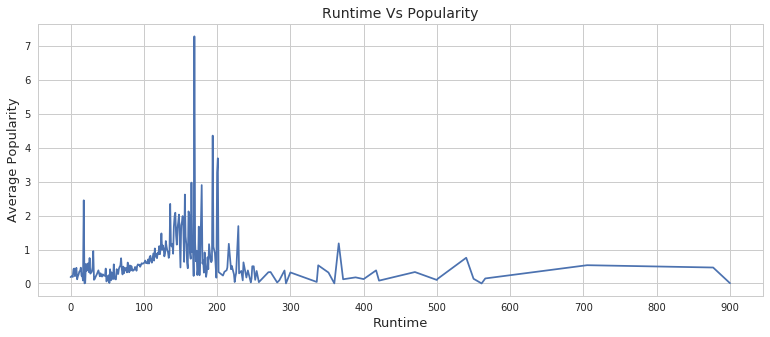

In [19]:
# I made the group of the data according to their runtime and find the mean popularity related to this and plot.
mvs_df.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(14,7)})
sns.set_style("whitegrid") 

#### The graph above shows how people don't enjoy movies shorter than 100 runtime at most and the movies which are longer with over 200 are boring to the audince because they are too long. So movies with runtime between 100 and 200 are the most liked.

<a id='conclusions'></a>
## Conclusions

> 1. The year with the highest movies released is 2014 with a 700 movies
> 2. From 1960 to 1980 there were only less 100 movies released per year

> 3. February throuhout the years had the lowest number of movies released
> 4. September and October top the charts with most released movies each year

> 5. The most loved movies rank between 100 and 200 runtime
> 6. Movies with a longer runtime are least liked

### Limitations
> TMDb movie dataset contained infomation with both 0 values and null values. The 0 values where not removed from the dataset, which would definitly affect the result. During the data exploration process, the data findings are limited and not giving its findings to its fulness due to limited questions asked.

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0